In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_csv('/content/athlete_events.csv')

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df.shape

(271116, 15)

In [ ]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [ ]:
df["Age"].fillna((df["Age"].mean()), inplace = True)
df["Height"].fillna((df["Height"].mean()), inplace = True)
df["Weight"].fillna((df["Weight"].mean()), inplace = True)

In [ ]:
df['Medal'].fillna('No Medal', inplace = True)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal


In [ ]:
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [ ]:
#Finding out the cities that have hosted Games
#grouping by the cities based on unique year values and later we will be sorting the data based on
#no. of occurance of each cities which hosted based on occurance

City = df.groupby('City').apply(lambda x:x['Year'].unique()).to_frame().reset_index()
City.columns=['City','Years']
City['Occurence']=[len(c) for c in City['Years']]
City.sort_values('Occurence',ascending=False)

,City,Years,Occurence
3,Athina,"[2004, 1906, 1896]",3
17,London,"[2012, 1948, 1908]",3
30,Sankt Moritz,"[1928, 1948]",2
26,Paris,"[1900, 1924]",2
37,Stockholm,"[1912, 1956]",2
18,Los Angeles,"[1932, 1984]",2
15,Lake Placid,"[1980, 1932]",2
14,Innsbruck,"[1964, 1976]",2
0,Albertville,[1992],1
27,Rio de Janeiro,[2016],1


In [ ]:
#Finding out participation of Men and Women at the Olympic games

print('Total number of athletes in Olymics:',len(df.ID.unique()))
print('Number of female participants in 120 years:',len(df[df.Sex=='F']))
print('Number of male participants in 120 years:',len(df[df.Sex=='M']))

Total number of athletes in Olymics: 135571
Number of female participants in 120 years: 74522
Number of male participants in 120 years: 196594


In [ ]:
df_summer = df[df["Season"] == "Summer"]
df_summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.00000,70.702393,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal


In [ ]:
#Participation of Men and Women in the Games over 120 years - Trend chart

Trend = df_summer.groupby(['Sex','Year']).size().reset_index().pivot(columns='Sex', index='Year', values=0).reset_index()
Trend.head()

Sex,Year,F,M
0,1896,NaN,380.0
1,1900,33.0,1903.0
2,1904,16.0,1285.0
3,1906,11.0,1722.0
4,1908,47.0,3054.0


In [ ]:
# Create figure with secondary y-axis


x = Trend["Year"]
y1 = Trend["F"]
y2 = Trend["M"]

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x = x, y = y1, mode = "lines+markers", name = "Female",
                        line=dict(color='Red', width=2)), secondary_y=False,)
fig.add_trace(go.Scatter(x = x, y = y2, mode = "lines+markers", name = "Male",
                        line=dict(color='Orange', width=2)), secondary_y=True,)

# Add figure title
fig.update_layout(
    title_text="Number of men and women athelete over time"
)

# Set x-axis title
fig.update_layout(title="Variation in count of male and female players",
                 xaxis_title = "Year")

# Set y-axes titles
fig.update_yaxes(title_text="Female", secondary_y=False)
fig.update_yaxes(title_text="Male", secondary_y=True)
fig.show()

In [ ]:
fig = px.histogram(df, x="Season", color="Sex", barmode = "group",
             color_discrete_map= {'M': 'Orange', 'F': 'Green'},
            )
fig.update_layout(
            title = "Participation of male and female athelete in both season",
            yaxis_title = "Athelete count")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Age Distribution of Athletes')

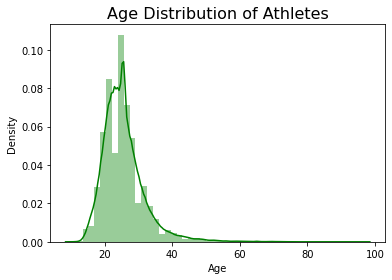

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

x=sns.distplot(df['Age'].dropna(),color='Green')
x.set_title('Age Distribution of Athletes',fontsize=16,fontweight=200)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Height Distribution of Athletes')

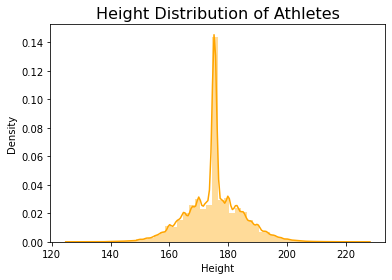

In [ ]:
h=sns.distplot(df['Height'].dropna(),color='Orange')
h.set_title('Height Distribution of Athletes',fontsize=16,fontweight=200)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Weight Distribution of Athletes')

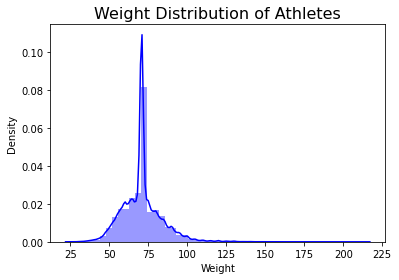

In [ ]:
w=sns.distplot(df['Weight'].dropna(),color='Blue')
w.set_title('Weight Distribution of Athletes',fontsize=16,fontweight=200)

In [ ]:
noc = pd.read_csv('/content/noc_regions.csv')

In [ ]:
noc.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
data = pd.merge(df, noc, on='NOC', how='left')
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,NaN
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,NaN


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



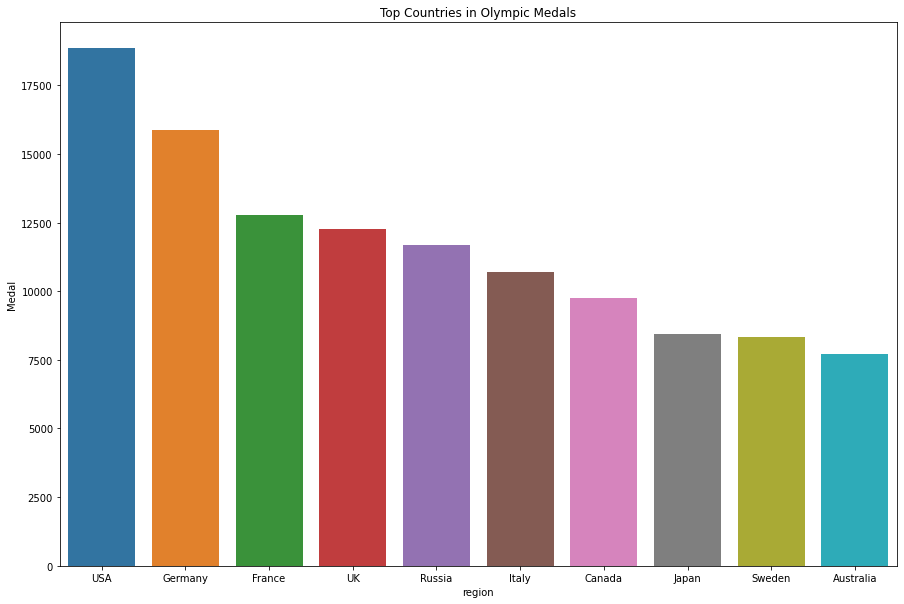

In [ ]:
plt.figure(figsize=(15, 10))
topc=data.groupby('region')['Medal'].count().nlargest(10).reset_index()
sns.barplot('region','Medal',data=topc)
plt.title('Top Countries in Olympic Medals')
plt.show()

In [ ]:
India = data[(data['region']=='India')]
medals = India['Medal'].value_counts()
medals

No Medal    1211
Gold         138
Bronze        40
Silver        19
Name: Medal, dtype: int64

In [ ]:
India['Gold'] = India['Medal'].map({'Gold': 1, 'Bronze': 0,'Silver':0})
India['Silver'] = India['Medal'].map({'Gold': 0, 'Bronze': 0,'Silver':1})
India['Bronze'] = India['Medal'].map({'Gold': 0, 'Bronze': 1,'Silver':0})
total_medals = India.groupby(['Year']).sum()

<ipython-input-29-66bf90b3fd0c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-66bf90b3fd0c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-66bf90b3fd0c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
total_medals.head()

,ID,Age,Height,Weight,Gold,Silver,Bronze
Year,,,,,,,
1900,485330,120.000000,876.694849,353.511965,0.0,2.0,0.0
1920,275178,178.898289,1227.372789,494.916750,0.0,0.0,0.0
1924,2667544,848.239679,5435.508066,2191.774180,7.0,0.0,0.0
1928,1462936,598.012085,4211.779397,1696.857430,14.0,0.0,0.0
1932,1788779,628.455187,4550.389699,1838.262215,15.0,0.0,0.0
